<a href="https://colab.research.google.com/github/Paul-mwaura/Programming-PyTorch-for-Deep-Learning/blob/main/Cats_and_Dogs_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning on Cats and Dogs Images

### Download Helper from Github

In [1]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2021-09-18 21:16:14--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2021-09-18 21:16:14 (36.1 MB/s) - ‘helper.py’ saved [2813/2813]



### Download the data from Kaggle

In [8]:
%%capture
!pip install kaggle # Install the Kaggle library
!mkdir ~/.kaggle  # Make a directory named “.kaggle”
!cp kaggle.json ~/.kaggle/  # Copy the “kaggle.json” into this new directory
!chmod 600 ~/.kaggle/kaggle.json  # Allocate the required permission for this file.

# Load Dataset from Kaggle.
!kaggle datasets download chetankv/dogs-cats-images

In [9]:
!unzip -q /content/dogs-cats-images.zip -d dogs-cats-images

### Import Libraries

In [10]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = "retina"


In [11]:
import helper

### Transforms

In [12]:
transforms = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.RandomRotation(30),
                                transforms.RandomResizedCrop(100),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5],
                                                    [0.5, 0.5, 0.5])])

### Load the Data Set

In [13]:
dataset = datasets.ImageFolder("/content/dogs-cats-images/dataset/training_set", transform=transforms)

### Data Loaders

In [14]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [15]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

# get one batch
images, labels = next(iter(dataloader))

### Visualize Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


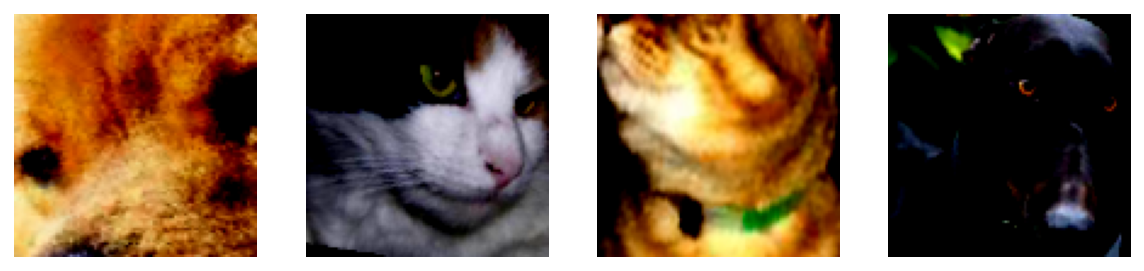

In [16]:
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for i in range(4):
    ax = axes[i]
    helper.imshow(images[i], ax=ax, normalize=False)

### Transfer Learning